# Deep Learning - HW 1 - Q2

In [1]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from matplotlib import pyplot as plt

### Importing data

In [2]:
inp_df=pd.read_csv(r'C:\Users\anand\Downloads\NU Classes\Deep Learning\Slides and Code\HW 1\Housing_Data.csv',index_col=0)
inp_df=inp_df[inp_df.index!=23493]
inp_df.head(3)

,districtText,furnishingCode,value,floorArea,bedrooms,bathrooms,pricePerSqFt,hasFloorplans,latitude,longitude
0,Hougang / Punggol / Sengkang,FULL,458000,990,3,2,462.6262626,True,1.402608,103.911427
1,Buona Vista / West Coast / Clementi Ne...,FULL,775000,1022,3,2,758.3170254,False,1.306192,103.782499
2,Ang Mo Kio / Bishan / Thomson,UNFUR,875000,1259,3,2,694.9960286,True,1.371803482,103.8535492


In [3]:
X=inp_df[['floorArea','bedrooms']].astype(float)
y=inp_df['value'].astype(float).to_frame()
X.head()

,floorArea,bedrooms
0,990.0,3.0
1,1022.0,3.0
2,1259.0,3.0
3,699.0,3.0
4,1184.0,3.0


In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test=train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [5]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = pd.DataFrame(std_scale.transform(X_train),columns=['floorArea','bedrooms'],index=X_train.index)
X_val = pd.DataFrame(std_scale.transform(X_val),columns=['floorArea','bedrooms'],index=X_val.index)
X_test = pd.DataFrame(std_scale.transform(X_test),columns=['floorArea','bedrooms'],index=X_test.index)

In [6]:
len(X_train[17600:17700])

85

In [7]:
def relu_derivative(val):
    return 1

### Initializing weights

In [8]:
alpha=0.005
w01_layer1=.5
w11_layer1=.4
w21_layer1=.3
w02_layer1=.2
w12_layer1=1.1
w22_layer1=1.6
w0_layer2=1.5
w1_layer2=.65
w2_layer2=.25


### Resuable Functions

In [9]:
def calc_expression(x1,x2,w0,w1,w2):
    "Input x1 and x2 as float"
    return w0+w1*x1+w2*x2

def calc_yhat(u1,u2,w0_layer2,w1_layer2,w2_layer2):
    return w0_layer2+w1_layer2*u1+w2_layer2*u2

def calc_MSE(yhat,y):
    return (yhat-y)*(yhat-y)

def relu_fn(val):
    return max(0,val)

def sigmoid(x):
    z = 1/(1 + np.exp(-x))
    return round(z,3)

def sigmoid_derivative(x):
    z = 1/(1 + np.exp(-x))
    return round(z/(1-z),3)

### Backpropagation

In [10]:
epochs=2
batch_size=256
train_MSE=[]
val_MSE=[]

In [11]:
y_train[:5]

,value
18726,448888.0
14276,435000.0
19667,520000.0
15371,540000.0
12066,597400.0


In [12]:
MSE=0
w0_layer2_grad=0
w1_layer2_grad=0
w2_layer2_grad=0
w01_layer1_grad=0
w11_layer1_grad=0
w21_layer1_grad=0
w02_layer1_grad=0
w12_layer1_grad=0
w22_layer1_grad=0

In [13]:
for epoch in range(epochs):
    print("epochs no: ",epoch)
    for i in range(0,int(len(y_train)/1.5)):
        
        "Forward pass"
        z1_layer1=calc_expression(float(X_train['floorArea'].iloc[i]),float(X_train['bedrooms'].iloc[i]),w01_layer1,w11_layer1,w21_layer1)
        z2_layer1=calc_expression(float(X_train['floorArea'].iloc[i]),float(X_train['bedrooms'].iloc[i]),w02_layer1,w12_layer1,w22_layer1)
        u1=sigmoid(z1_layer1)
        u2=sigmoid(z2_layer1)
        yhat=calc_yhat(u1,u2,w0_layer2,w1_layer2,w2_layer2)
              
        MSE+=calc_MSE(yhat,float(y_train.iloc[i]))
        
        error_layer2=2*(yhat-float(y_train.iloc[i]))
        error1_layer1=sigmoid(error_layer2*w1_layer2)
        error2_layer1=sigmoid(error_layer2*w2_layer2)

        w0_layer2_grad+=error_layer2
        w1_layer2_grad+=error_layer2*u1
        w2_layer2_grad+=error_layer2*u2

        w01_layer1_grad+=error1_layer1*sigmoid_derivative(z1_layer1)
        w11_layer1_grad+=error1_layer1*float(X_train['floorArea'].iloc[i])*sigmoid_derivative(z1_layer1)
        w21_layer1_grad+=error1_layer1*float(X_train['bedrooms'].iloc[i])*sigmoid_derivative(z1_layer1)
        w02_layer1_grad+=error2_layer1*sigmoid_derivative(z2_layer1)
        w12_layer1_grad+=error2_layer1*float(X_train['floorArea'].iloc[i])*sigmoid_derivative(z2_layer1)
        w22_layer1_grad+=error1_layer1*float(X_train['bedrooms'].iloc[i])*sigmoid_derivative(z2_layer1)
        
        if i%batch_size==0 and i!=0:
            MSE=MSE/batch_size
            train_MSE.append(MSE)
            
            yhat_val=calc_yhat(X_val['floorArea'].iloc[:100],X_val['bedrooms'].iloc[:100],w0_layer2,w1_layer2,w2_layer2)            
            val_MSE.append(sum((round(yhat_val,0)-y_val['value'].iloc[:100])*(round(yhat_val,0)-y_val['value'].iloc[:100]))/100)

            w01_layer1=w01_layer1-alpha*w01_layer1_grad/batch_size
            w11_layer1=w11_layer1-alpha*w11_layer1_grad/batch_size
            w21_layer1=w21_layer1-alpha*w21_layer1_grad/batch_size
            w02_layer1=w02_layer1-alpha*w02_layer1_grad/batch_size
            w12_layer1=w12_layer1-alpha*w12_layer1_grad/batch_size
            w22_layer1=w22_layer1-alpha*w22_layer1_grad/batch_size
            w0_layer2=w0_layer2-alpha*w0_layer2_grad/batch_size
            w1_layer2=w1_layer2-alpha*w1_layer2_grad/batch_size
            w2_layer2=w2_layer2-alpha*w2_layer2_grad/batch_size
            
            MSE=0
            w0_layer2_grad=0
            w1_layer2_grad=0
            w2_layer2_grad=0
            w01_layer1_grad=0
            w11_layer1_grad=0
            w21_layer1_grad=0
            w02_layer1_grad=0
            w12_layer1_grad=0
            w22_layer1_grad=0

epochs no:  0


C:\Users\anand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


epochs no:  1


In [14]:
print(val_MSE)

[304592100080.85, 297711555857.25, 290639508187.58, 283884857189.27, 277577336869.82, 271315190446.7, 265286540800.43, 259833251952.96, 254273054221.12, 249266434869.82, 244101584213.26, 239302424293.06, 234636800918.83, 230106670401.66, 225743997790.66, 221690230244.04, 217429757167.67, 213557971093.71, 209617438734.59, 205855149421.76, 202353276069.45, 198926703480.08, 195565262187.8, 192487114620.77, 189349634312.89, 186396528547.5, 183479023933.86, 180552666930.56, 177934176506.05, 175279432876.68, 172807039935.4, 170317878575.26, 167968078417.4, 165678834014.82, 163330078117.25, 161242665451.11, 159315718836.13, 157351049970.58, 155351717313.86, 153397740980.21, 151667871046.17, 149992071511.74, 148298060853.93, 146746663924.82, 145106667963.03, 143687991766.68, 142268032391.54, 140835995923.58, 139384880866.62, 138005742809.91, 136724917824.86, 135447477282.8, 134221940628.59, 133137175019.25, 132027042468.0, 131031015698.14, 129967985574.97, 129029065459.36, 128082429396.95, 127

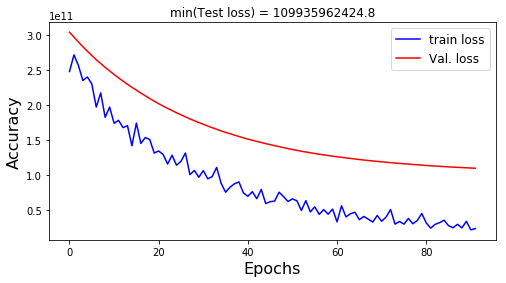

In [15]:
from scipy import interpolate
plt.figure(figsize=(8,4))


plt.plot(range(len(train_MSE)),train_MSE,'b', label='train loss')
plt.plot(range(len(val_MSE)),val_MSE,'r', label='Val. loss')



plt.title('min(Test loss) = ' + str(round(min(val_MSE),1)),fontsize=12)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.legend(fontsize=12)

In [16]:
"Predict Forward pass"
z1_layer1=calc_expression(float(X_test['floorArea'].iloc[0]),float(X_test['bedrooms'].iloc[0]),w01_layer1,w11_layer1,w21_layer1)
z2_layer1=calc_expression(float(X_test['floorArea'].iloc[0]),float(X_test['bedrooms'].iloc[0]),w02_layer1,w12_layer1,w22_layer1)
u1=sigmoid(z1_layer1)
u2=sigmoid(z2_layer1)
yhat=calc_yhat(u1,u2,w0_layer2,w1_layer2,w2_layer2)

print("Predicted = ",round(yhat))
print("Actual = ",float(y_test.iloc[5]))

Predicted =  388635.0
Actual =  390000.0


In [28]:
"Predict Forward pass"
yhatlst=[]
z1_layer1=calc_expression(float(X_test['floorArea'].iloc[1]),float(X_test['bedrooms'].iloc[0]),w01_layer1,w11_layer1,w21_layer1)
z2_layer1=calc_expression(float(X_test['floorArea'].iloc[1]),float(X_test['bedrooms'].iloc[0]),w02_layer1,w12_layer1,w22_layer1)
u1=sigmoid(z1_layer1)
u2=sigmoid(z2_layer1)
yhat=calc_yhat(u1,u2,w0_layer2,w1_layer2,w2_layer2)
yhatlst.append(round(yhat))
print("Predicted = ",round(yhat))
print("Actual = ",float(y_train.iloc[3]))

Predicted =  358754.0
Actual =  540000.0


In [29]:
"Predict Forward pass"
z1_layer1=calc_expression(float(X_test['floorArea'].iloc[2]),float(X_test['bedrooms'].iloc[1]),w01_layer1,w11_layer1,w21_layer1)
z2_layer1=calc_expression(float(X_test['floorArea'].iloc[2]),float(X_test['bedrooms'].iloc[1]),w02_layer1,w12_layer1,w22_layer1)
u1=sigmoid(z1_layer1)
u2=sigmoid(z2_layer1)
yhat=calc_yhat(u1,u2,w0_layer2,w1_layer2,w2_layer2)
yhatlst.append(round(yhat))
print("Predicted = ",round(yhat))
print("Actual = ",float(y_train.iloc[3]))

Predicted =  420596.0
Actual =  540000.0


In [30]:
"Predict Forward pass"
z1_layer1=calc_expression(float(X_test['floorArea'].iloc[3]),float(X_test['bedrooms'].iloc[2]),w01_layer1,w11_layer1,w21_layer1)
z2_layer1=calc_expression(float(X_test['floorArea'].iloc[3]),float(X_test['bedrooms'].iloc[2]),w02_layer1,w12_layer1,w22_layer1)
u1=sigmoid(z1_layer1)
u2=sigmoid(z2_layer1)
yhat=calc_yhat(u1,u2,w0_layer2,w1_layer2,w2_layer2)
yhatlst.append(round(yhat))
print("Predicted = ",round(yhat))
print("Actual = ",float(y_train.iloc[3]))

Predicted =  323984.0
Actual =  540000.0


In [31]:
yhatlst

[358754.0, 420596.0, 323984.0]

In [32]:
price_compare=pd.DataFrame(yhatlst)
price_compare=price_compare.rename(columns={0:'Predicted Value'}).round(0)
price_compare

,Predicted Value
0,358754.0
1,420596.0
2,323984.0


In [33]:
price_compare['Actual Value']=y_test.reset_index().iloc[:3]['value']
price_compare.head(3)

,Predicted Value,Actual Value
0,358754.0,888000.0
1,420596.0,338000.0
2,323984.0,420000.0
